In [1]:
import pandas as pd

In [2]:
bc = pd.read_csv('BreastCancer.csv')

In [3]:
bc

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,776715,3,1,1,1,3,2.0,1,1,1,benign
695,696,841769,2,1,1,1,2,1.0,1,1,1,benign
696,697,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,698,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [42]:
bc.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [43]:
bc.Class.value_counts()

benign       458
malignant    241
Name: Class, dtype: int64

### Handling Null

In [44]:
bc.isnull().sum()

Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [45]:
bc['Bare.nuclei'].fillna(bc['Bare.nuclei'].mean(),inplace=True)

In [46]:
bc.isnull().sum()[bc.isnull().sum()>0]

Series([], dtype: int64)

In [47]:
bc = bc.drop(['Unnamed: 0','Id'],axis=1)

In [48]:
bc.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [49]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     699 non-null    int64  
 1   Cell.size        699 non-null    int64  
 2   Cell.shape       699 non-null    int64  
 3   Marg.adhesion    699 non-null    int64  
 4   Epith.c.size     699 non-null    int64  
 5   Bare.nuclei      699 non-null    float64
 6   Bl.cromatin      699 non-null    int64  
 7   Normal.nucleoli  699 non-null    int64  
 8   Mitoses          699 non-null    int64  
 9   Class            699 non-null    object 
dtypes: float64(1), int64(8), object(1)
memory usage: 54.7+ KB


### Label Encoder

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
bc.Class = le.fit_transform(bc.Class)

In [52]:
bc.select_dtypes(include='object').columns

Index([], dtype='object')

In [53]:
bc.head(3)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0


### Sampling

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_bc,test_bc = train_test_split(bc,test_size=0.2)

In [57]:
print(bc.shape,"  ", train_bc.shape,"  ", test_bc.shape)

# data distributed in train and test...original_size...train_size...test_size

(699, 10)    (559, 10)    (140, 10)


In [58]:
train_bc_x = train_bc.iloc[ : , : -1]
train_bc_y = train_bc.iloc[ : ,-1]

In [59]:
test_bc_x = test_bc.iloc[ : , :-1]
test_bc_y = test_bc.iloc[ : , -1]

### Model Building

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logreg = LogisticRegression()

In [62]:
logreg.fit(train_bc_x,train_bc_y)

LogisticRegression()

### Prediction

In [63]:
pred = logreg.predict(test_bc_x)
pred

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1])

### Confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix

In [66]:
tab = confusion_matrix(test_bc_y,pred)
tab

array([[91,  3],
       [ 2, 44]], dtype=int64)

### Accuracy

In [77]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy

96.42857142857143

### Recall Score

In [67]:
from sklearn.metrics import recall_score

In [69]:
recall_score(test_bc_y,pred)*100

95.65217391304348

### Precision

In [70]:
from sklearn.metrics import precision_score

In [71]:
precision_score(test_bc_y,pred)*100

93.61702127659575

### F1_Score

In [72]:
from sklearn.metrics import f1_score

In [73]:
f1_score(test_bc_y,pred)*100

94.62365591397848

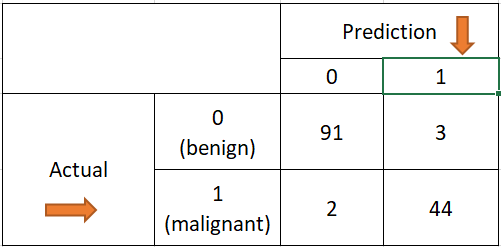

In [75]:
from IPython import display
display.Image('bc_m1.PNG')

### Total 94 patients are normal and not dangerous cancer result but model has predicted 3 patients high risk cancer

### Total 46 patients have high risk cancer but out of that model has predicted 2 patients have not risk cancer

### Overall model is good